Matrix Approximation
Carlos Zuna Largo

Load "sleepy_dog.jpg" into the notebook and convert it to grayscale.

Color Image Size: (650, 1200, 3)


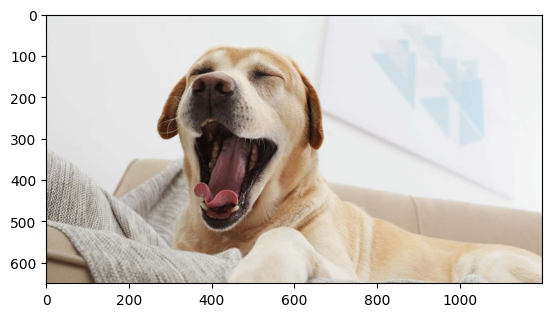

Grayscale Image Size(650, 1200)


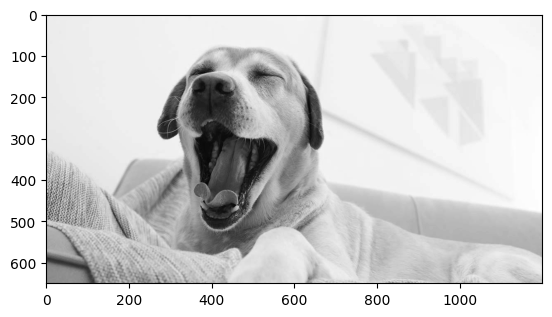

In [89]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

A = imread('sleepy_dog.jpg')
print("Color Image Size: " + str(A.shape))
imgA = plt.imshow(A)
plt.show()

# Convert RGB to grayscale
X = np.mean(A, -1); 
print("Grayscale Image Size" + str(X.shape))
imgX = plt.imshow(X)
imgX.set_cmap('gray')
plt.show()

Compute Singular Value Decomposition of Grayscale Image 

In [90]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
# Inlcude this or else S.shape = (650,1) and not (650,650)
S = np.diag(S) 
print("Size of Matrix U: " + str(U.shape))
print("Size of Matrix S: " + str(S.shape))
print("Size of Matrix VT: " + str(VT.shape))

Size of Matrix U: (650, 650)
Size of Matrix S: (650, 650)
Size of Matrix VT: (650, 1200)


Construct Approximate Grayscale Image using SVD at varying Truncation rank values of "r"
r = 5
r = 20
r = 100

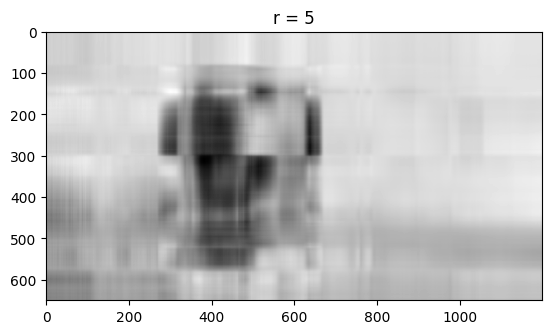

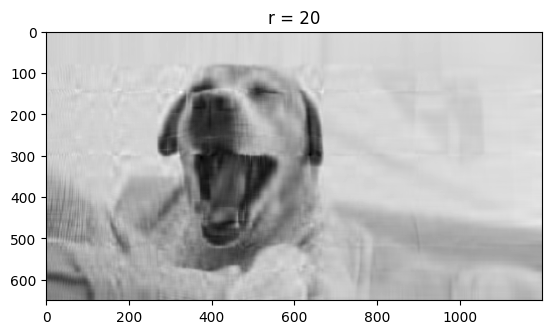

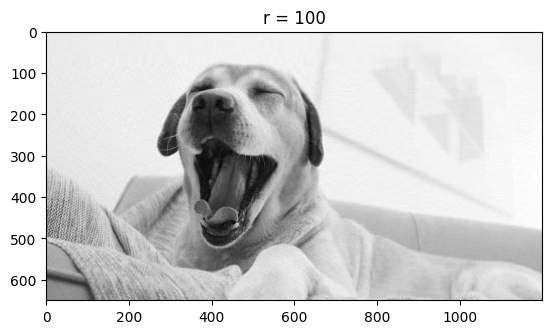

In [91]:
j = 0
for r in (5,20,100):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.show()

Plot Singular Values vs truncation rank values

$\sigma_{r}$ vs r  

Size of matrix s_vals: 650
650


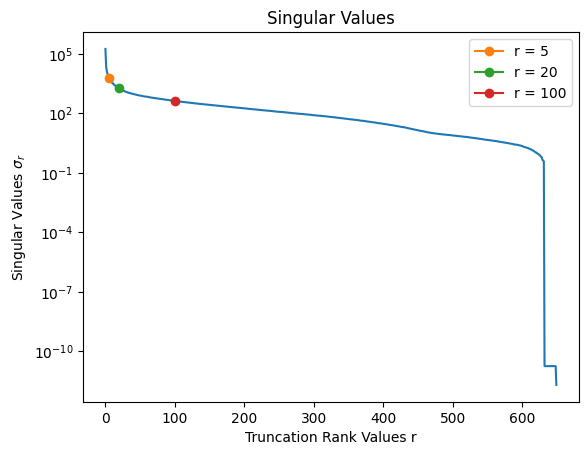

In [115]:
s_vals = np.diag(S)
r_vals = range(0,len(s_vals))
print('Size of matrix s_vals: ' + str(len(s_vals)))
print(len(r_vals))
plt.figure(1)
plt.semilogy(r_vals,s_vals)
plt.semilogy(r_vals[5],s_vals[5],marker='o',label='r = 5')
plt.semilogy(r_vals[20],s_vals[20],marker='o',label='r = 20')
plt.semilogy(r_vals[100],s_vals[100],marker='o',label='r = 100')
plt.xlabel('Truncation Rank Values r')
plt.ylabel("Singular Values $\\sigma_{r}$")
plt.legend()
plt.title('Singular Values')
plt.show()

Plot the Cumulative Sum $\sum_{k=1}^{r} \sigma_{k}$ of the first r singular values

Size of Matrix cumsum_s_vals: (650,)


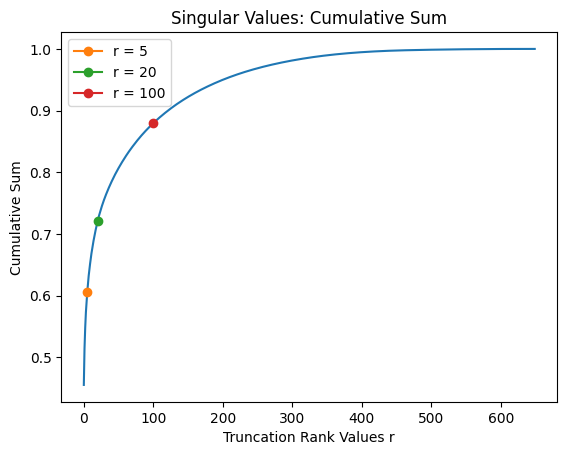

In [118]:
cumsum_s_vals = np.cumsum(s_vals)/np.sum(s_vals)
print('Size of Matrix cumsum_s_vals: ' + str(cumsum_s_vals.shape))
plt.figure(2)
plt.plot(r_vals,cumsum_s_vals)
plt.plot(r_vals[5],cumsum_s_vals[5],marker='o',label='r = 5')
plt.plot(r_vals[20],cumsum_s_vals[20],marker='o',label='r = 20')
plt.plot(r_vals[100],cumsum_s_vals[100],marker='o',label='r = 100')
plt.xlabel('Truncation Rank Values r')
plt.ylabel("Cumulative Sum")
plt.legend()
plt.title('Singular Values: Cumulative Sum')
plt.show()